

Integrantes:
* ALEXA PAMELA AYARZA ARELLANO
* MARÍA ALEJANDRA LOPEZ LOPEZ


En este notebook se analizará grupo de índices de los mercados bursátiles de latinoamérica. Las series seleccionadas son las de Argentina (MERVAL), Brasil (IBOV), Chile (IPSA), Colombia (IGBC), Mexico (MEXBOL) y Peru (SPBLPGPT). 

El inicio del periodo a estudiar es desde diferentes fechas según disponibilidad de datos: 26 de diciembre de 1991 (Argentina), 16 de marzo de 1995 (Brasil), 9 de agosto de 1990 (Chile), 26 de julio de 2001 (Colombia), 31 de marzo de 1994 (México) y 7 de febrero de 2002 (Perú); todas las seis series terminan el 31 junio de 2021.

Los datos son los precios de los índices en frecuencia diaria y han sido tomados de [Bloomberg Financial Data](https://bba.bloomberg.net/). Sea $p_{t}$ el precio del índice el día $y$, el retorno se define como la variación porcentual en logaritmos del precio de la forma $r_{t}=100\times\left[\log\left(p_{t}\right)-\log\left(p_{t-1}\right)\right]$.

In [ ]:
# Se importan las librerías necesarias

import numpy as np # Para el cálculo numérico
import pandas as pd # Para el manejo de bases de datos 
import matplotlib.pyplot as plt # Para graficar 
%matplotlib inline
from scipy.stats import norm # Para la distribución normal

In [ ]:
# Los datos obtenidos de Bloomberg fueron almacenados en repositorio
path = 'https://github.com/alexaayarza/FINAL/raw/main/source.xlsx'

# Se importan las series desde GitHub
series = pd.read_excel(path, sheet_name = 'source', index_col = 0)

# Los datos "originales" se transforman a retornos
logret_series = (100 * (np.log(series) - np.log(series.shift(1))))

# Se guardan las nuevas series generadas
logret_series.to_excel("logret_series.xlsx")  

# Se muestra lo obtenido hasta el momento
print('Precios diarios de los índices bursátiles latinoamericanos')
display(series.head())
print('')
print('Retornos diarios de los índices bursátiles latinoamericanos')
display(logret_series.head())

Precios diarios de los índices bursátiles latinoamericanos


,MERVAL,IBOV,IPSA,IGBC,MEXBOL,SPBLPGPT
Dates,,,,,,
1990-08-08,NaN,NaN,92.18,NaN,NaN,NaN
1990-08-09,NaN,NaN,92.10,NaN,NaN,NaN
1990-08-10,NaN,NaN,93.28,NaN,NaN,NaN
1990-08-13,NaN,NaN,93.51,NaN,NaN,NaN
1990-08-14,NaN,NaN,93.64,NaN,NaN,NaN



Retornos diarios de los índices bursátiles latinoamericanos


,MERVAL,IBOV,IPSA,IGBC,MEXBOL,SPBLPGPT
Dates,,,,,,
1990-08-08,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-09,NaN,NaN,-0.086824,NaN,NaN,NaN
1990-08-10,NaN,NaN,1.273078,NaN,NaN,NaN
1990-08-13,NaN,NaN,0.246266,NaN,NaN,NaN
1990-08-14,NaN,NaN,0.138926,NaN,NaN,NaN


In [ ]:
# Se programará una función para graficar las series

def graf(ts, nombre_pais):

  '''Esta función crea un subplot para cada una de las series en el DataFrame 
     ts. La variable country_name serán los nombres con los que aparecerá cada
     serie en el gráfico.'''

  # El número de filas dependerá del número de series en el DataFrame ingresado
  nrows = np.ceil(ts.shape[1] / 2).astype(int) 

  # El número de columnas siempre será 2
  ncols = 2                                    

  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  for col, ax in zip(ts.columns, axes.flatten()):
    ax.plot(ts.index, ts[col])
    # Se asignan los nombres definidos en nombre_pais
    ax.set_xlabel(nombre_pais[ts.columns.get_loc(col)], fontsize=14, 
                  fontweight='bold')
    ax.grid()

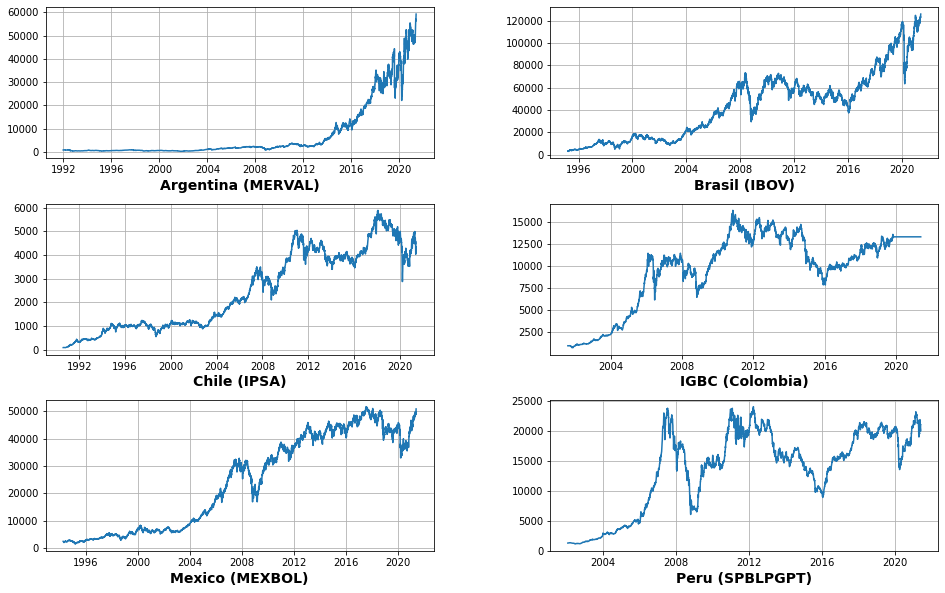

In [ ]:
# Una vez definida la función se utiliza para graficar las series de precios

nombre_pais = ['Argentina (MERVAL)', 'Brasil (IBOV)', 'Chile (IPSA)', 'IGBC (Colombia)', 'Mexico (MEXBOL)', 'Peru (SPBLPGPT)']
graf(series, nombre_pais)

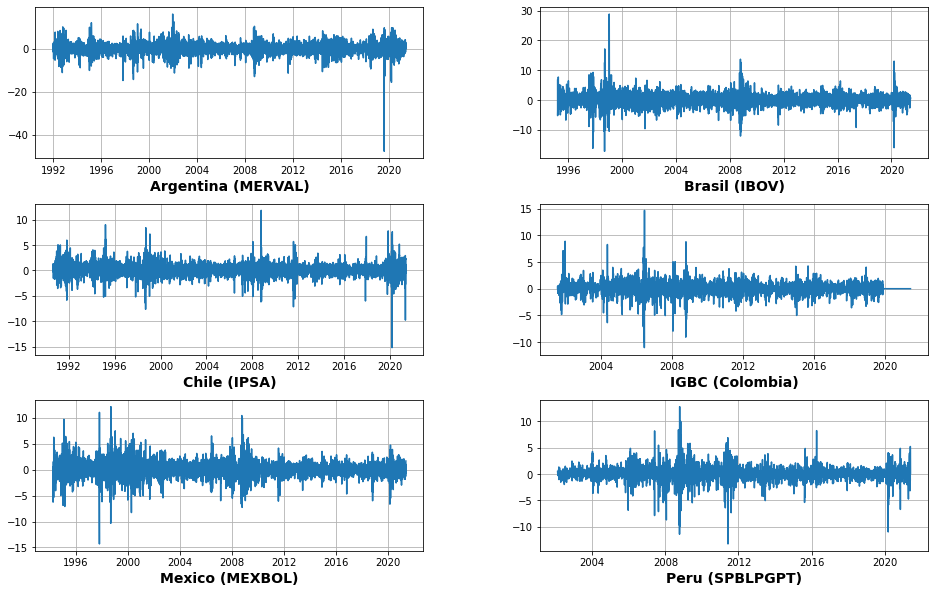

In [ ]:
# Ahora, se utiliza para graficar las series en retornos
graf(logret_series, nombre_pais)

En los retornos se ven regularidades empíricas como reversión a la media, agrupamientos de volatilidad (*clustering*) y mayor volatilidad durante la crisis financiera de 2008-2009 y la pandemia de COVID-19 en curso desde 2020. A continuación se inspeccionarán los estadísticos descriptivos para un análisis más exacto. Para esto se personalizará el output de la función `describe()` para obtener estadísticos descriptivos como los que usualmente se utilizan en la literatura. Del los estadísticos por default de `describe()` mantendré, "count", "mean", "std", "min" y "max". Pero adicionalmente agregaré la asimetría y la kurtosis, y la fecha de inicio y final de las observaciones para cada país. Esto será configurado mediante una función.

In [ ]:
def est_descriptivos(ts):

  # se selecciona el número de observaciones, la media, desviación estandar, 
  # mínimo, máximo, la asimetría y la kurtosis
  descriptivos = pd.concat([ts.describe()\
                            .loc[['count', 'mean', 'std', 'min', 'max']].T, 
                            ts.skew().rename('skew'), ts.kurt().\
                            rename('kurt')], axis=1).round(2)
  descriptivos['count'] = descriptivos['count'].astype(int)


  # se agrega la fecha inicio
  fecha_inicio = ts.apply(lambda ts: ts.first_valid_index())
  fecha_inicio = pd.DataFrame(fecha_inicio, columns=['Fecha Inicio'])

  # se agrega la fecha fin
  fecha_fin = ts.apply(lambda ts: ts.last_valid_index())
  fecha_fin = pd.DataFrame(fecha_fin, columns=['Fecha Fin'])

  descriptivos = pd.concat([fecha_inicio, fecha_fin, descriptivos], axis = 1)

  # output
  print('')
  display(descriptivos)
  print('')

# Se utiliza la función para los retornos
print('Estadísticos descriptivos para los retornos de los mercados LATAM')
print('')
est_descriptivos(logret_series)

Estadísticos descriptivos para los retornos de los mercados LATAM




,Fecha Inicio,Fecha Fin,count,mean,std,min,max,skew,kurt
MERVAL,1991-12-26,2021-05-31,7678,0.06,2.30,-47.69,16.12,-1.43,27.93
IBOV,1995-03-16,2021-05-31,6838,0.05,1.97,-17.23,28.82,0.09,13.97
IPSA,1990-08-09,2021-05-31,8038,0.05,1.14,-15.22,11.80,-0.31,12.93
IGBC,2001-07-26,2021-05-31,5178,0.05,1.15,-11.05,14.69,-0.18,15.50
MEXBOL,1994-03-31,2021-05-31,7088,0.04,1.40,-14.31,12.15,0.03,7.51
SPBLPGPT,2002-02-07,2021-05-31,5038,0.06,1.34,-13.29,12.82,-0.57,12.89


La tabla muestra los estadísticos descriptivos de los retornos. Estos tienen valores extremos entre un mínimo de -15.22 (Chile) y un máximo de 28.82 (Brasil). En términos de desviación estándar el mercado de Chile es el menos volatil y el argentino el más volatiles. Para todos los casos los retornos son leptokúrticos.

Ahora bien, usualmente en la teoría financiera se asumen retornos normales a pesar de que la literatura empírica señala colas anchas en las distribuciones de los retornos. En el caso específico de los retornos del mercado bursátil peruano se grafica la distribución de densidad y se compara con la de una distribución normal. Como se ve, las colas de la distribución de los retornos locales supera largamente a la de la $\mathcal{D}$($\mathcal{N}$).

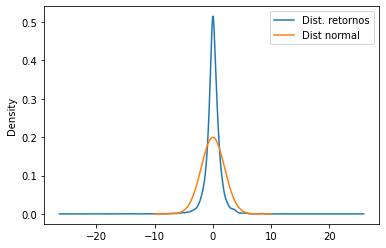

In [ ]:
# Se crea una variable que contenga los retornos del mercado peruano

spblpgpt=logret_series.iloc[:,5].dropna() # La serie del Perú está en la fila 5
spblpgpt.plot(kind='kde', label = 'Dist. retornos')

# Así mismo, se comparará la gráfica con la de una distribución normal
x_axis = np.arange(-10, 10, 0.001)
# Se genera y grafica la distribucion normal
plt.plot(x_axis, norm.pdf(x_axis,0,2), label = 'Dist normal') 
plt.legend()
plt.show()

In [15]:
%%capture
!pip install nbconvert

In [16]:
%%shell
jupyter nbconvert --to html /content/final_ayarza_lopez.ipynb

[NbConvertApp] Converting notebook /content/final_ayarza_lopez.ipynb to html
[NbConvertApp] Writing 543673 bytes to /content/final_ayarza_lopez.html
